<h2>Allison Madsen Individual Project Results: ATACseq</h2>

<h3> METHODS: </h3>

First, quality control (QC) was conducted on all four samples using FastQC version 0.12.1-0 with default parameters [1]. The Nextera PE adapter sequences were selected for trimming based on the FastQC results.  Adapter trimming was then performed using Trimmomatic version 0.39 with the command "trimmomatic PE ILLUMINACLIP:NexteraPE-PE.fa:2:30:10" and a minimum length parameter of 30 [2]. Subsequently, QC was performed on the trimmed reads using FastQC version 0.12.1-0, followed by compilation of a final QC report for all samples using MultiQC version 1.20 [3].

Bowtie2 version 2.5.3 was utilized to build an index for the provided reference genome (hg38), utilizing default parameters [4]. Alignment of forward and reverse paired reads for each sample to the reference genome (hg38) was then conducted using Bowtie2 with parameters "--very-sensitive -X2000 -k 10", allowing a maximum fragment length of 2000 for valid paired-end alignments, and retaining the top 10 distinct, valid alignments for each read. 

Following alignment, the resulting BAM files were indexed and sorted using Samtools version 1.19.2. Samtools idxstats was performed on the indexed BAM files to quantify reads mapped to the mitochondrial chromosome, and any alignments to the mitochondrial chromosome were subsequently removed using Samtools view version 1.19.2 and command line arguments [5].

After filtering, the BAM files were indexed and sorted again using Samtools version 1.19.2, and Samtools idxstats was rerun on the filtered indexed BAM files to quantify reads removed due to mapping to the mitochondrial chromosome [5]. To address bias induced by the tagmentation process, reads were shifted using Deeptools version 3.5.4 with the method "alignmentSieve" and the flag "--ATACshift", which is equivalent to --shift 4 -5 5 -4 [6].

A quality control analysis plotting fragment distribution sizes for the samples was conducted using ATACSeqQC 1.26.0, generating an R script (version 4.1.1) to perform QC checks per sample [7][14]. Peak calling was performed with MACS3 version 3.0.1 on the paired-end data using the "callPeaks" function with a minimum false discovery rate (FDR) cutoff value of 0.01 [8]. 

The intersection between replicates was identified with Bedtools version 2.31.1, retaining peaks with at least 50% overlap in both replicates (-f 0.5 and -r) as specified by Encode's data processing standards for ATACseq data [9][10].  Reproducible peaks were filtered using Bedtools version 2.31.1 to remove peaks falling into blacklisted regions. HOMER version 4.11 annotatePeaks and findMotifsGenome was used to annotate peaks and identify motifs in the reproducable peaks set using the human reference genome hg38, the -go flag was added to also perform gsea analysis while annotating peaks and motifs were limited to a region size of 200 [11].

Gene set enrichment analysis was primarily performed using DAVID, and later compared to the results from HOMER [11][12]. An R script (version 4.1.1) was generated to reformat the Entrez IDs for the reproducable peaks annotated as "promotor TSS" for compatibility with DAVID's web-based interface [13]. This selection was made as to only perform gene set enrichment on peaks found in the TSS site.  

Deeptools version 3.5.4 bamCoverage, computeMatrix, and plotProfile were utilized to create a TSS signal plot displaying the NFR and NBR regions centered around the TSS site, with NBR regions defined to have a minimum fragment length of 100bp, and the NFR region included all other fragments [6]. Reference point was specified in ComputeMatrix to center the data around the TSS, and --perGroup was utilized to plot both signals on one figure.  Finally, a pie chart was created using base R functions to display the proportions of regions with accessible chromatin called as a peak [14].

<h3>QUESTIONS: </h3>

1. Briefly remark on the quality of the sequencing reads and the alignment statistics, make sure to specifically mention the following:<br>
    a. Are there any concerning aspects of the quality control of your sequencing reads?<br>
    b. Are there any concerning aspects of the quality control related to alignment?<br>
    c. Based on all of your quality control, will you exclude any samples from further analysis?<br>

<b>FastQC was run on the reads from the two samples before and after trimming.  Sequence quality scores, fragment lengths, and GC content pre- and post- trimming shows no reason for concern about sequence quality.  Pre-trimming FastQC results were used to identify the correct set of adapter trimming sequences.</b>  <br>

<b>After alignment and filtering of mitochondrial genes, ATACseqQC was used to produce fragment distribution plots for each of the paired read samples.  The fragment distribution plot shows an enrichment of fragments under 100 bp as exepcted, which is indicitive of nucleosome free regions that are chromatin not bound by histones.  The plot also shows an enrichment of fragments of length 200, indicating single nucleosomes, which normally present in ATACseq experiments.  Based on the fragment distribution plots, the trimmed reads are of good quality.</b>   <br>

<b>No, no samples will be excluded from analysis, and peak calling was performed for both paired reads.</b>  

2. After alignment, quickly calculate how many alignments were generated from each sample in total and how many alignments were against the mitochondrial chromosome<br>
    a. Report the total number of alignments per sample<br>
    b. Report the number of alignments against the mitochondrial genome<br>

<b>Total Number of Alignments rep3:</b>      352,633,242   <br>
<b>Total Number of Alignments rep4:</b>      259,257,336   <br>

<b>Number of aligments againts mito genome rep3:</b>      91,695,494    <br>
<b>Number of aligments againts mito genome rep4:</b>      125,633,951   <br>

3. After performing peak calling analysis, generating a set of reproducible peaks and filtering peaks from blacklisted regions, please answer the following:<br>
    a. How many peaks are present in each of the replicates?<br>
    b. How many peaks are present in your set of reproducible peaks? What strategy did you use to determine “reproducible” peaks?<br>
    c. How many peaks remain after filtering out peaks overlapping blacklisted regions?<br>

<b>Peaks in rep3:</b>   30392     <br>
<b>Peaks in rep4:</b>   26596
<br><br> 
<b>Number of reproducible peaks:</b>   18963
<br>
<b>Number of peaks after filtering blacklisted region:</b>     18461

4. After performing motif analysis and gene enrichment on the peak annotations, please answer the following:<br>
    a. Briefly discuss the main results of both of these analyses<br>
    b. What can chromatin accessibility let us infer biologically?<br>

<b>Motif analysis and gene set enrichment analysis identified binding motifs and gene functions associated with cell differentiation and proliferation, specifically for immune line cells. 

<b>Some of the top genes from the motif analysis include: Sp1, NFY, CTCF, Fra1, RUNX, and SWi6.  These genes either act as zinc finger transcription factors, or are active in the differentiation and proliferation processes for different types of immune cells.  

<b>Gene set enrichment analysis uisng DAVID identified top cellular pathways including mitochondria related genes, cell cycle genes, and genes involved in lipid membrane formation.  These results are in agreeement with the motif analysis results, as they are also all involved in cell proliferation and differentation.  
    
<b>These results are consistent with GO terms and KEGG patways identified during HOMER peak annotation, which identified genes involved in cytoplasm formation, cell metabolism/cell cycle, lymphatic tissues specifically.  

<b>Chromatin accessability an important aspect of gene regulation because it influences the ability of transcription factors and other regulatory proteins to bind to DNA and control gene expression.  Regions of open chromatin are typically associated with active gene expression, and by mapping chromatin accessibility across the genome, regions where genes are likely to be actively transcribed can be predicted.  Additionally, different cell types have distinct patterns of chromatin accessibility, reflecting their unique gene expression profiles. By comparing chromatin accessibility profiles between different cell types, insights into cell identity and differentiation processes can be gained.

<h2> DELIVERABLES </h2>

1. Produce a fragment length distribution plot for each of the samples

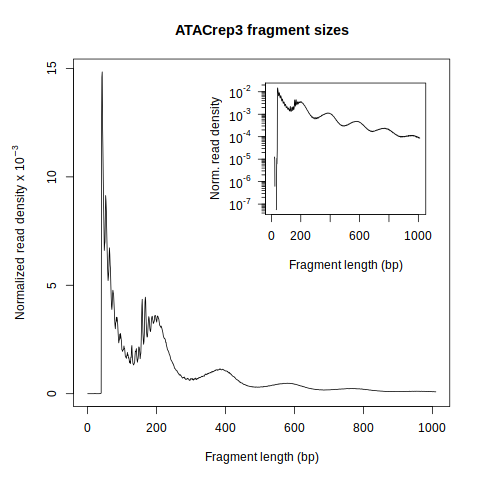

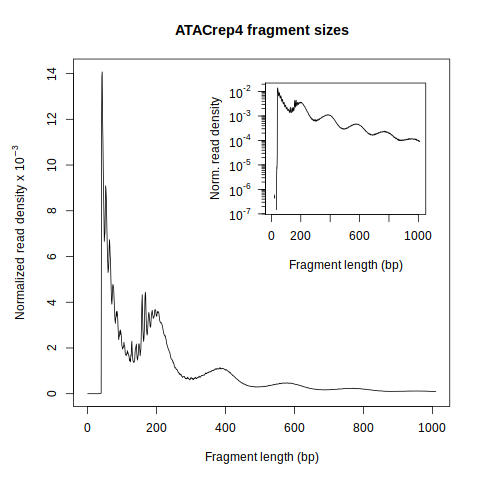

2. Produce a table of how many alignments for each sample before and after filtering alignments falling on the mitochondrial chromosome

<h3>REP3 MT alignment data:</h3>

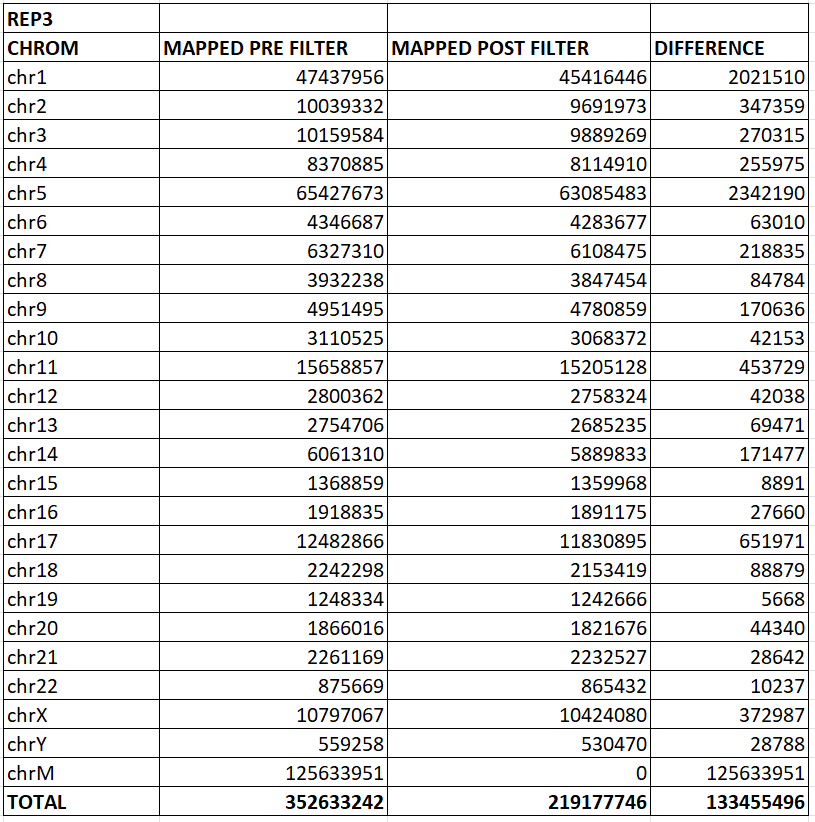

<h3>REP4 MT alignment data:</h3>

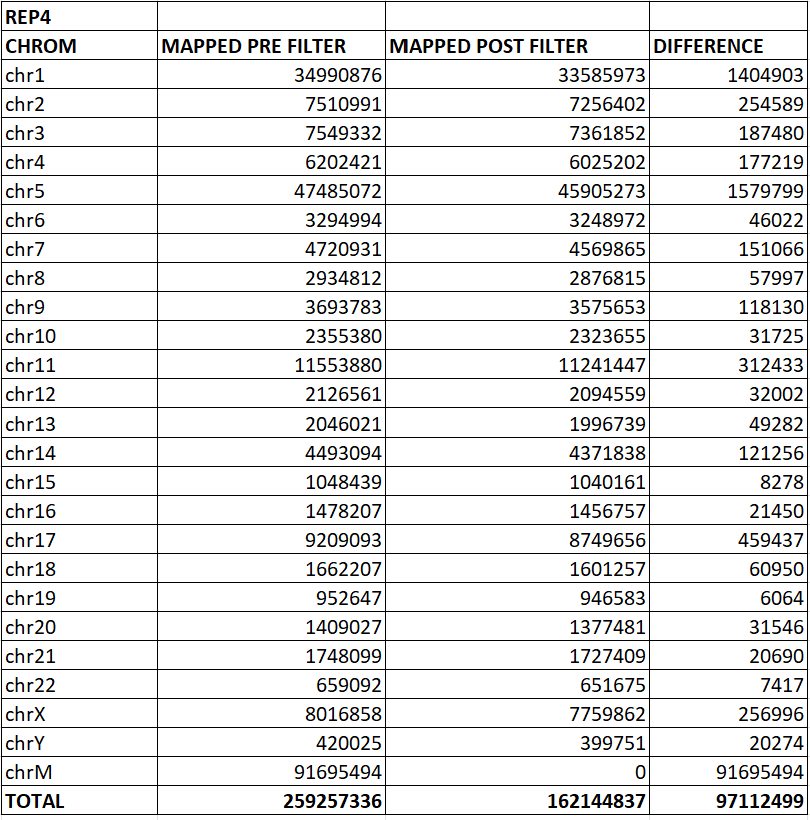

3.  Create a signal coverage plot centered on the TSS (plotProfile) for the nucleosome-free regions (NFR) and the nucleosome-bound regions (NBR)

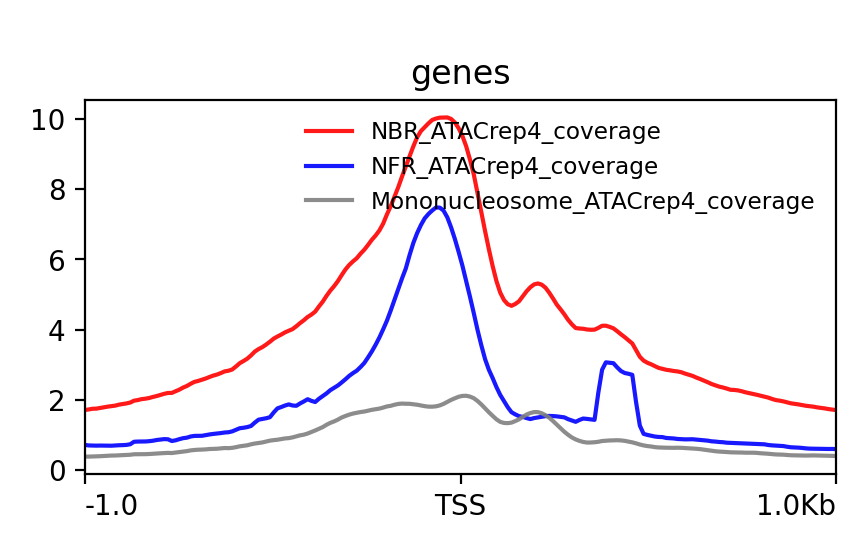

4.  A table containing the number of peaks called in each replicate, and the number of reproducible peaks

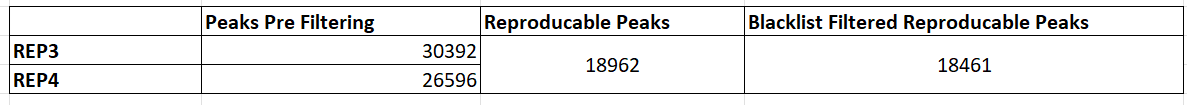

5.  A single BED file containing the reproducible peaks you determined from the experiment.

<b>The full file is available on gitHub in the results folder. 
Here is an example of the head of the file:  
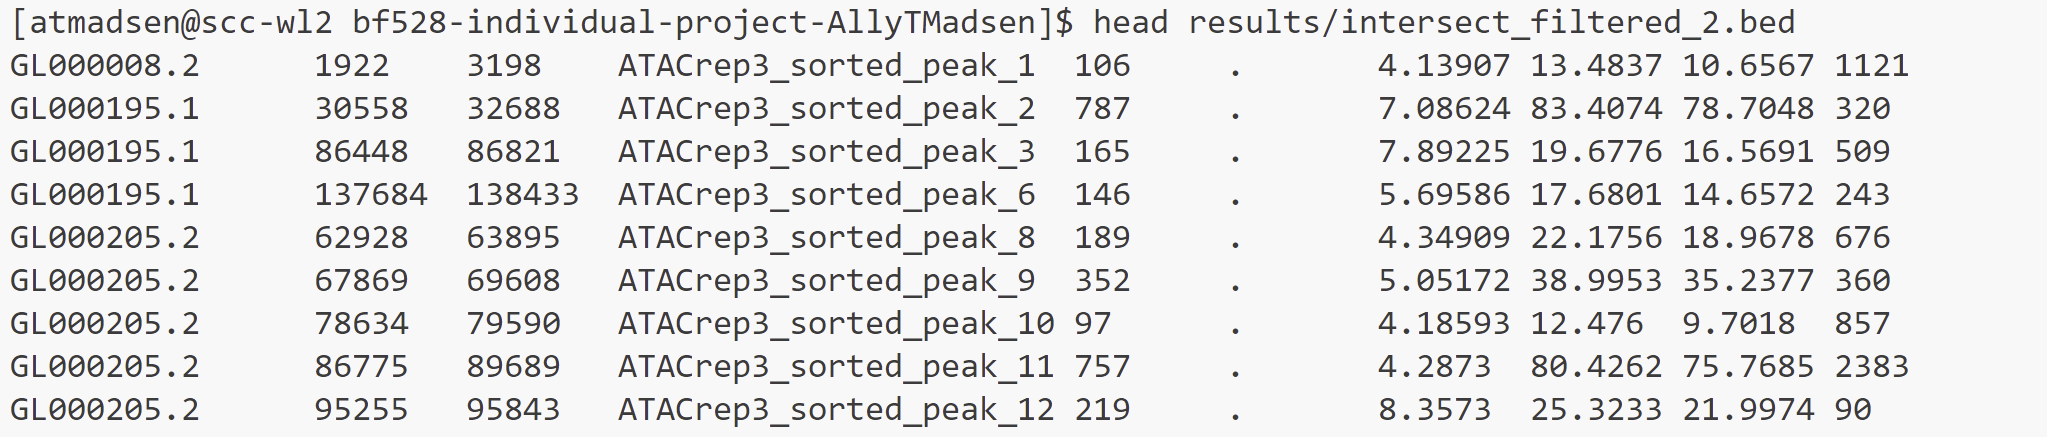

6.  Perform motif finding on your reproducible peaks.  Create a single table / figure with the most interesting results

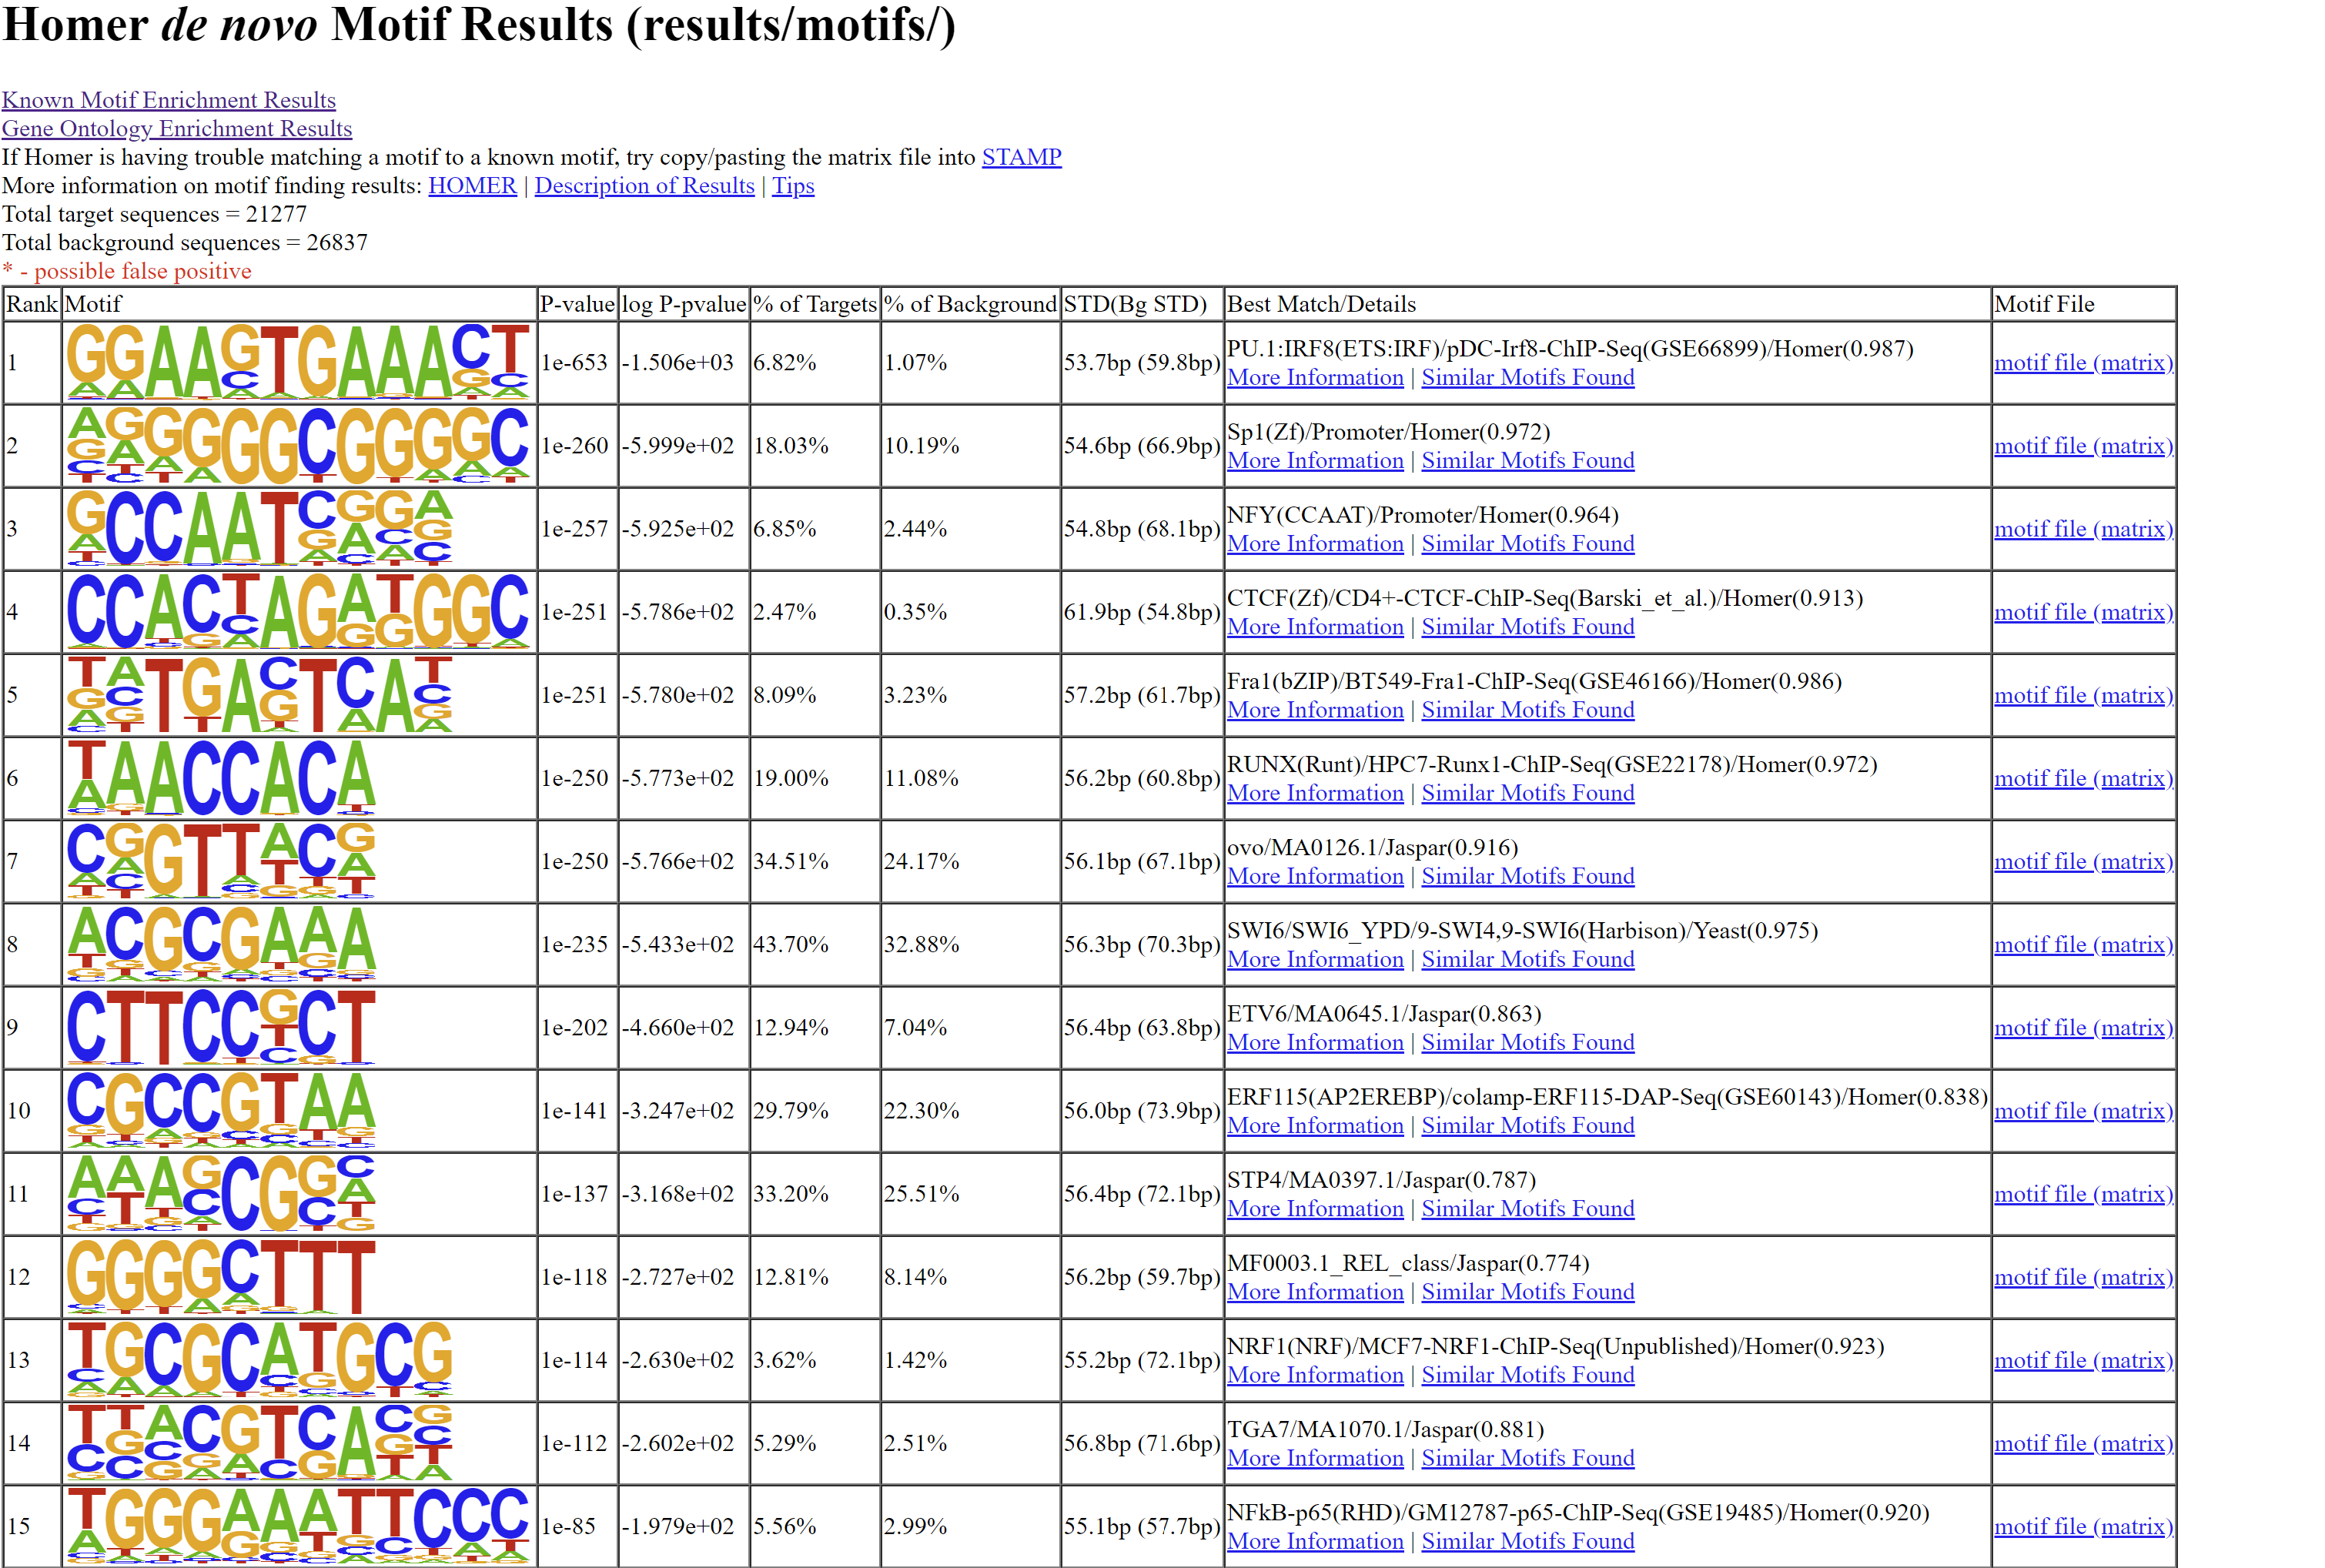

7.  Perform a gene enrichment analysis on the annotated peaks using a well-validated gene enrichment tool.  Create a single table / figure with the most interesting results

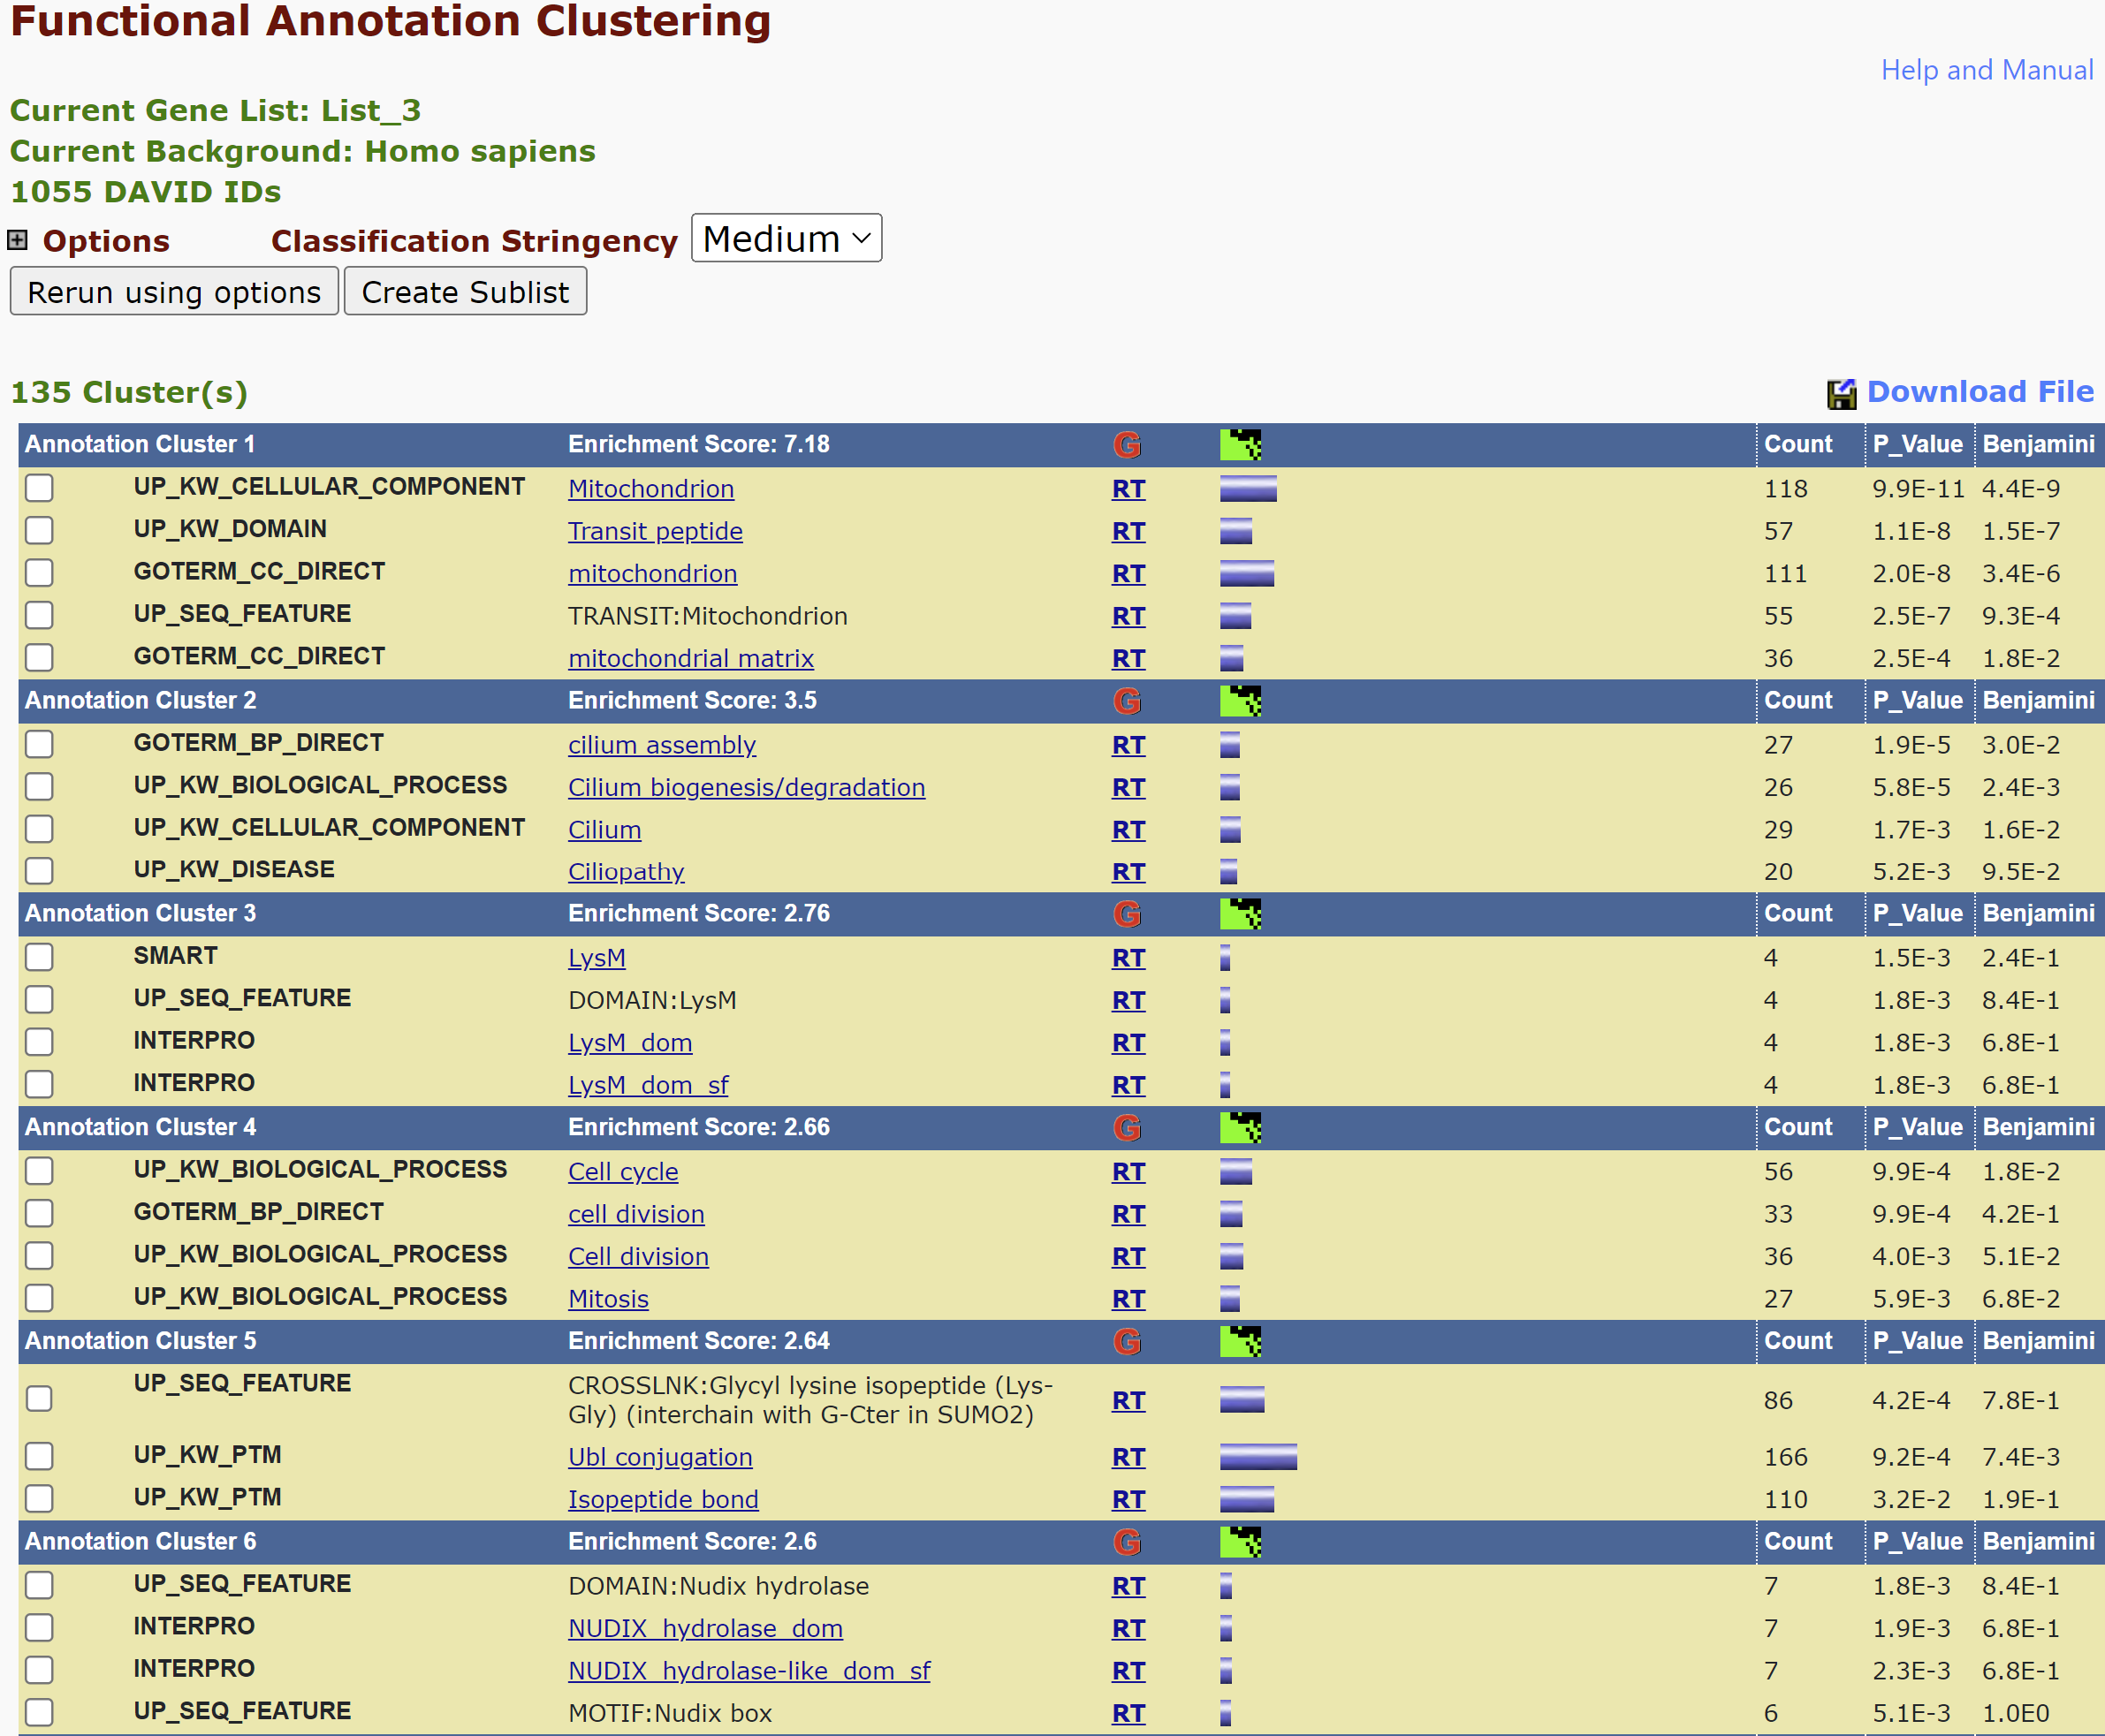

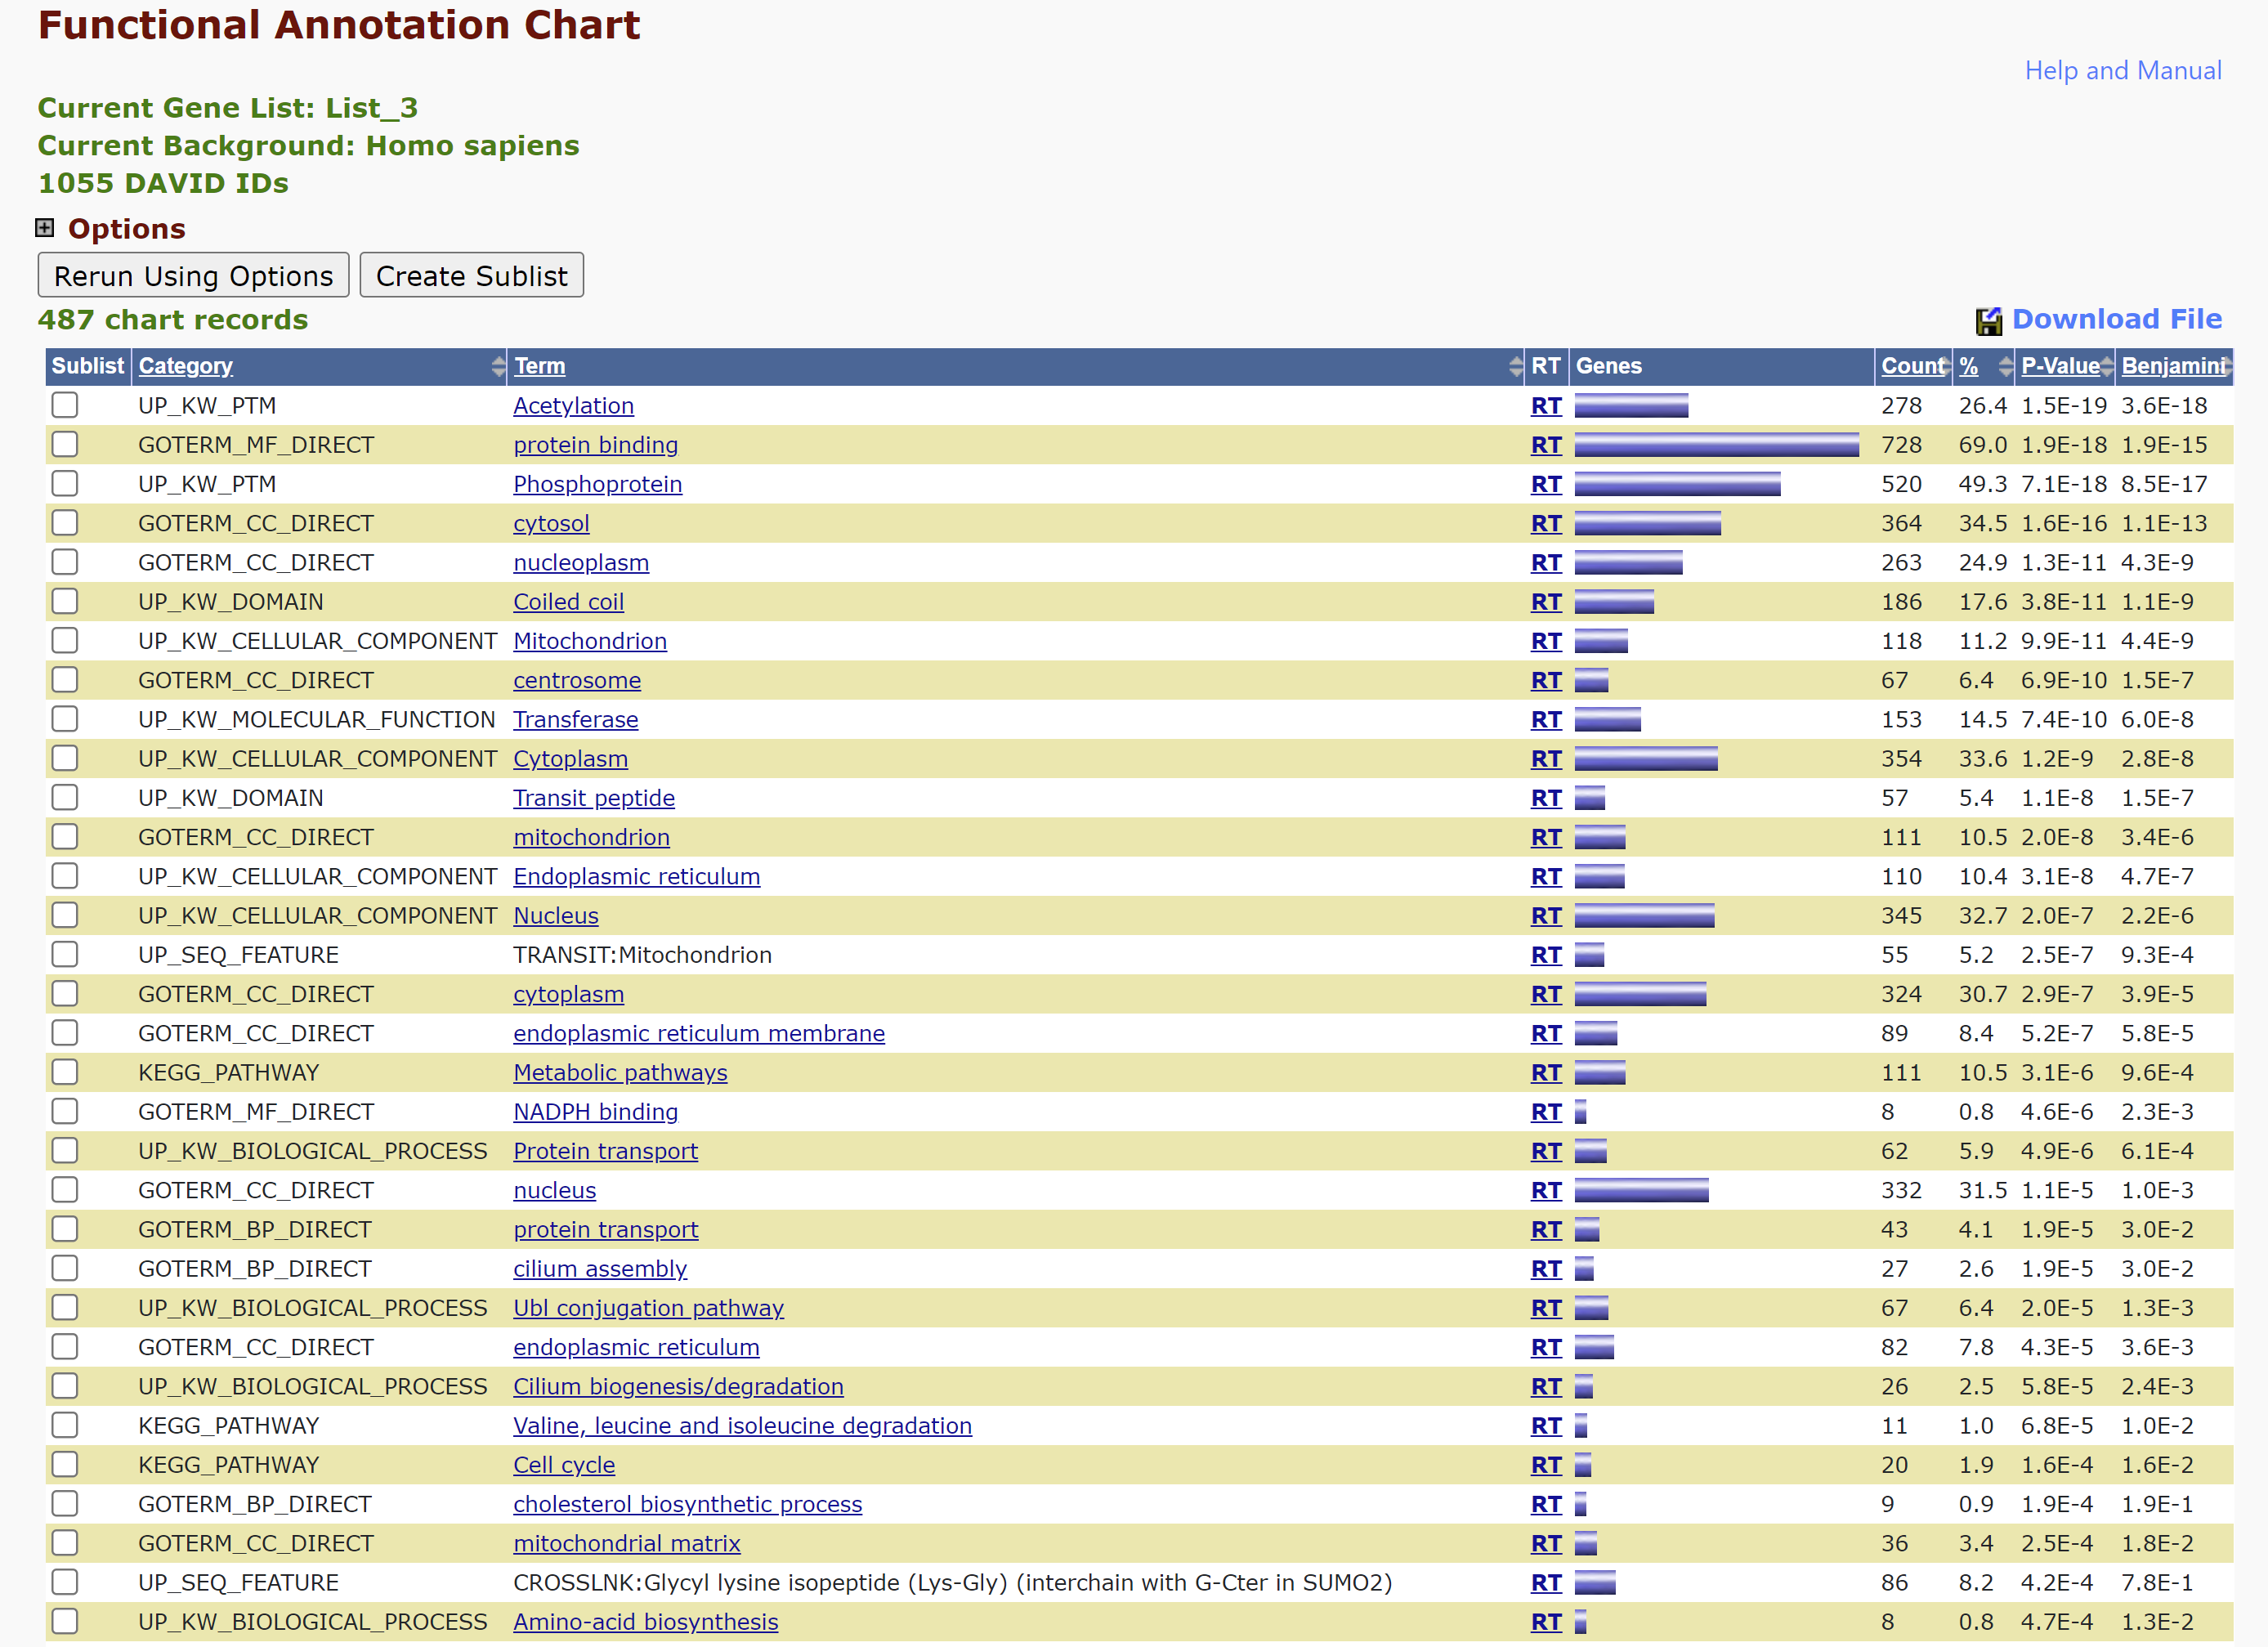

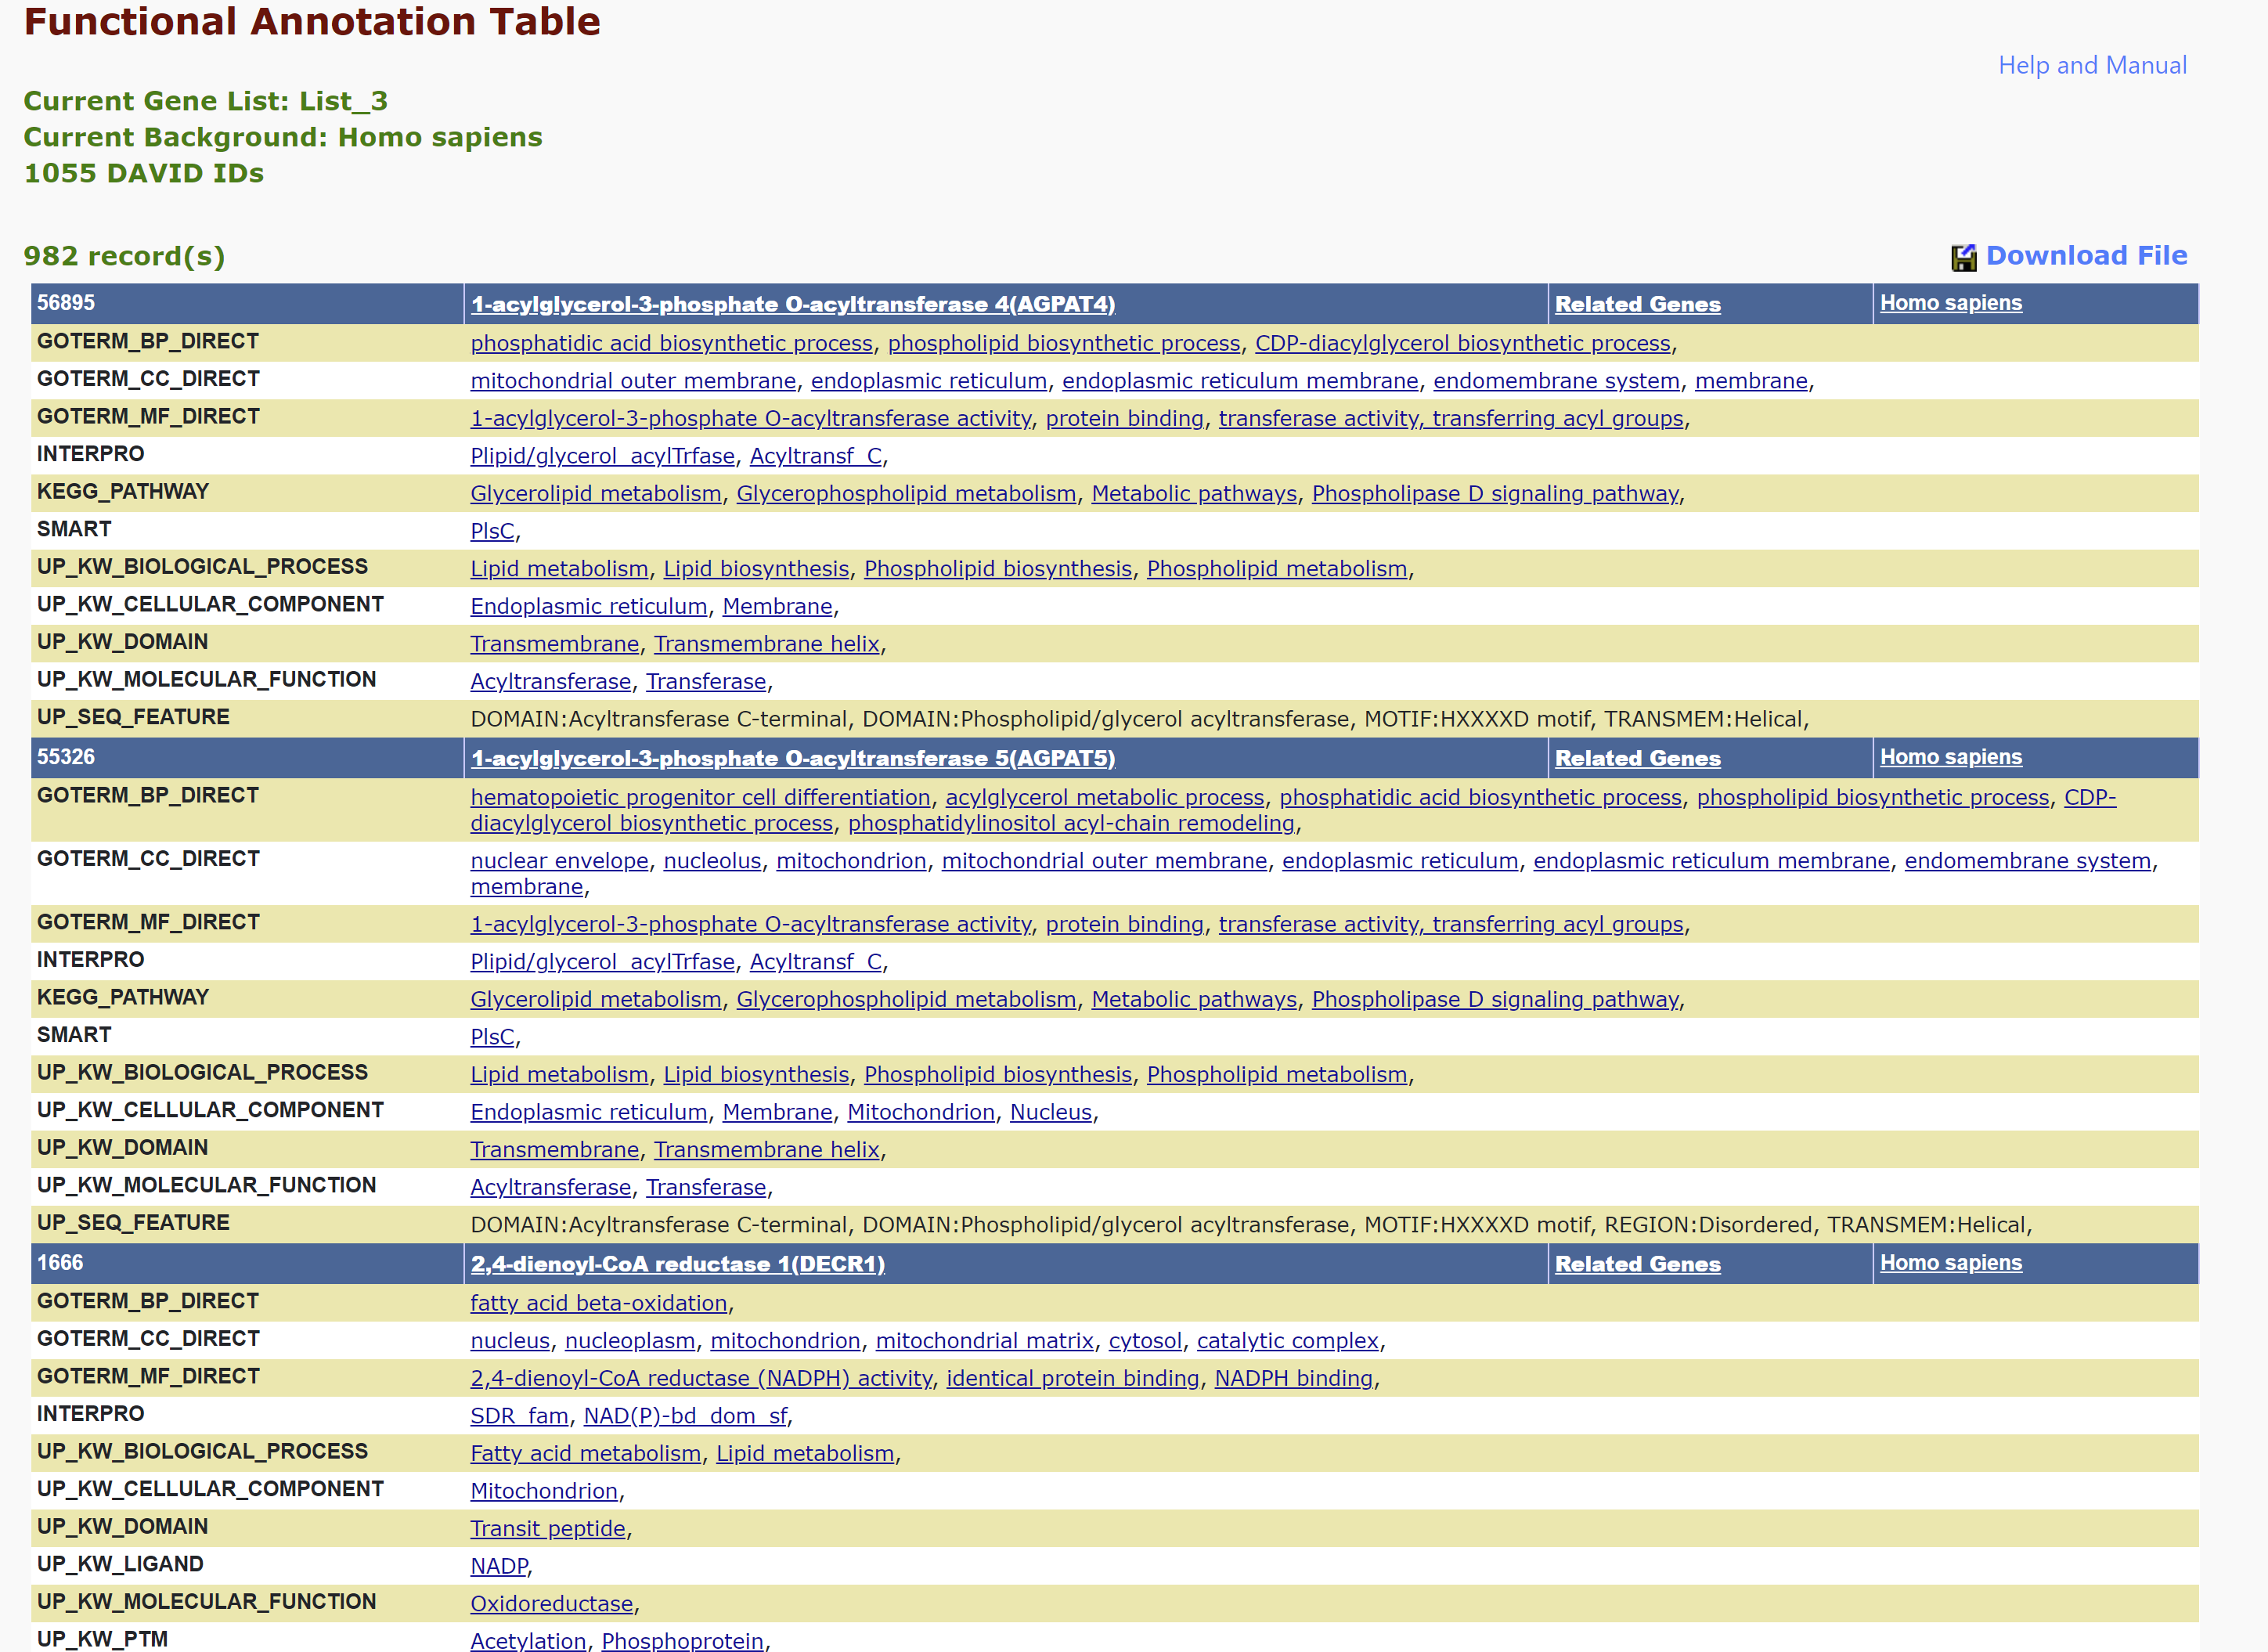

8.  Produce a figure that displays the proportions of regions that appear to have accessible chromatin called as a peak (Promoter, Intergenic, Intron, Exon, TTS, etc.)

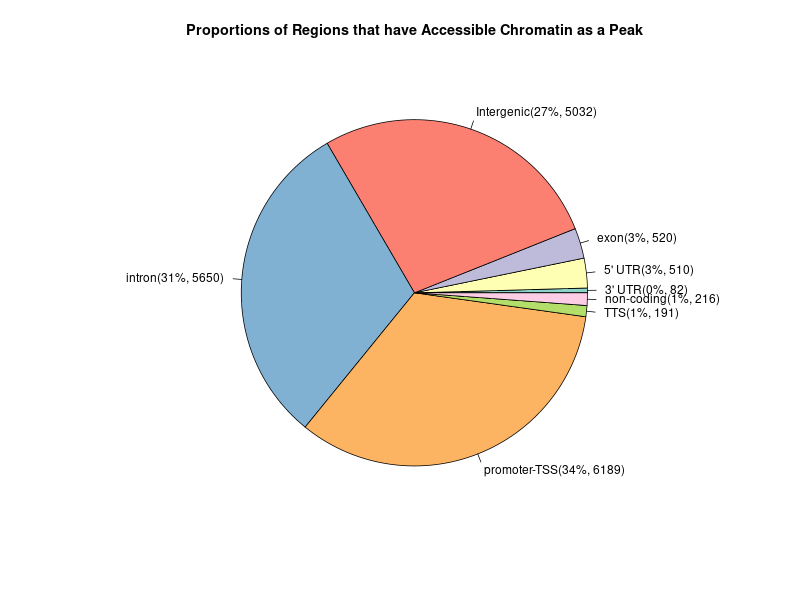

<h3> Citations: </h3>

1.  Andrews, S. (2010). FastQC:  A Quality Control Tool for High Throughput Sequence Data [Online]. Available online at: http://www.bioinformatics.babraham.ac.uk/projects/fastqc/
2.  Bolger, A. M., Lohse, M., & Usadel, B. (2014). Trimmomatic: a flexible trimmer for Illumina sequence data. Bioinformatics (Oxford, England), 30(15), 2114–2120. https://doi.org/10.1093/bioinformatics/btu170
3. Philip Ewels, Måns Magnusson, Sverker Lundin, Max Käller, MultiQC: summarize analysis results for multiple tools and samples in a single report, Bioinformatics, Volume 32, Issue 19, October 2016, Pages 3047–3048, https://doi.org/10.1093/bioinformatics/btw354
4. Langmead B, Salzberg S. Fast gapped-read alignment with Bowtie 2. Nature Methods. 2012, 9:357-359.
5.  Heng Li, Bob Handsaker, Alec Wysoker, Tim Fennell, Jue Ruan, Nils Homer, Gabor Marth, Goncalo Abecasis, Richard Durbin, 1000 Genome Project Data Processing Subgroup, The Sequence Alignment/Map format and SAMtools, Bioinformatics, Volume 25, Issue 16, August 2009, Pages 2078–2079, https://doi.org/10.1093/bioinformatics/btp352
6. Ramírez, F., Dündar, F., Diehl, S., Grüning, B. A., & Manke, T. (2014). deepTools: a flexible platform for exploring deep-sequencing data. Nucleic acids research, 42(Web Server issue), W187–W191. https://doi.org/10.1093/nar/gku365
7. Ou, J., Liu, H., Yu, J. et al. ATACseqQC: a Bioconductor package for post-alignment quality assessment of ATAC-seq data. BMC Genomics 19, 169 (2018). https://doi.org/10.1186/s12864-018-4559-3
8. Zhang, Y., Liu, T., Meyer, C.A. et al. Model-based Analysis of ChIP-Seq (MACS). Genome Biol 9, R137 (2008). https://doi.org/10.1186/gb-2008-9-9-r137
9. Aaron R. Quinlan, Ira M. Hall, BEDTools: a flexible suite of utilities for comparing genomic features, Bioinformatics, Volume 26, Issue 6, March 2010, Pages 841–842, https://doi.org/10.1093/bioinformatics/btq033
10. ATAC-seq data standards and processing pipeline. (2020). Retrieved from https://www.encodeproject.org/atac-seq/ 
11. Heinz S, Benner C, Spann N, Bertolino E et al. Simple Combinations of Lineage-Determining Transcription Factors Prime cis-Regulatory Elements Required for Macrophage and B Cell Identities. Mol Cell 2010 May 28;38(4):576-589. PMID: 20513432
12. B.T. Sherman, M. Hao, J. Qiu, X. Jiao, M.W. Baseler, H.C. Lane, T. Imamichi and W. Chang. DAVID: a web server for functional enrichment analysis and functional annotation of gene lists (2021 update). Nucleic Acids Research. 23 March 2022. doi:10.1093/nar/gkac194.[PubMed]
13. Huang DW, Sherman BT, Lempicki RA. Systematic and integrative analysis of large gene lists using DAVID Bioinformatics Resources. Nature Protoc. 2009;4(1):44-57.  [PubMed]
14. R Core Team (2021). R: A language and environment for statistical computing. R Foundation for Statistical Computing, Vienna, Austria. https://www.R-project.org/.